In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import gym
import pandas
import torch
import torch.nn as nn
import random
from collections import deque
from agents.DQN import DQN
from networks.base_network import StandardNN
import gym
from torch import nn
import torch
from typing import Union
import numpy as np
import matplotlib.pyplot as plt
from environments.easy import easy_env

In [4]:
import matplotlib.pyplot as plt
def moving_average(x, window_length: Union[int, None] = None) -> np.array:
    if window_length is None:
        window_length = len(x) // 50
    return np.convolve(x, np.ones(window_length), "valid") / window_length


def plot_results(test_rewards):
    ma_rewards = moving_average(test_rewards)
    plt.plot(ma_rewards, label="rewards")
    plt.show()

In [5]:
env = gym.make('CartPole-v1')

try:
    n_obs = env.reset().size
except AttributeError:
    print('oh no, n_obs unknown')

n_actions = env.action_space.n  # Not sure how to programatically get this - some manual config will do


# agent = eg_model(network1, env.action_space.n)

In [6]:
network1 = StandardNN(n_obs, n_actions)

In [89]:
# env = easy_env()
# n_actions = env.n_actions
# n_obs = env.n_obs

In [10]:
max_games = 5000
agent = DQN(network1, n_actions, env, max_games= max_games, min_epsilon=0.1, lr=0.1)
agent._play_games(max_games)

In [12]:
agent.action_counts

{0: 32382, 1: 33600}

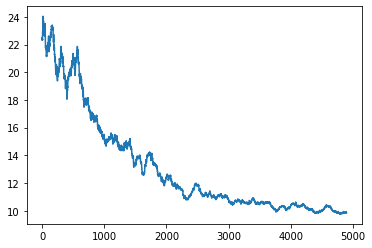

In [11]:
total_rewards = [i[-1] for i in agent.reward_averages]
plot_results(total_rewards)

In [16]:
a = [torch.tensor([4, 3]).tolist(), torch.tensor([1, 2]).tolist()]

In [18]:
torch.tensor(a)

tensor([[4, 3],
        [1, 2]])

In [49]:
b = [torch.tensor([-0.0392, -0.0203, -0.0448, -0.0247]), 1, 1.0, torch.tensor([-0.0396,  0.1754, -0.0453, -0.3312]), False]
torch.tensor(b)

ValueError: only one element tensors can be converted to Python scalars

In [66]:
import torch

net = nn.Sequential(
    nn.Linear(2, 2),
    nn.Linear(2, 1)
)

In [67]:
net

Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Linear(in_features=2, out_features=1, bias=True)
)

In [70]:
inp = torch.tensor([[1.0, 2.0],[3.0, 4.0]], dtype=torch.float32)


In [71]:
net(inp)

tensor([[0.1233],
        [0.4014]], grad_fn=<AddmmBackward0>)